In [ ]:
!pip install mlflow boto3 -q

     |████████████████████████████████| 17.9 MB 27.1 MB/s 
     |████████████████████████████████| 132 kB 57.2 MB/s 
     |████████████████████████████████| 209 kB 60.6 MB/s 
     |████████████████████████████████| 596 kB 48.8 MB/s 
     |████████████████████████████████| 81 kB 5.0 MB/s 
     |████████████████████████████████| 79 kB 8.3 MB/s 
     |████████████████████████████████| 181 kB 68.5 MB/s 
     |████████████████████████████████| 146 kB 63.9 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 9.0 MB 37.8 MB/s 
     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 127 kB 54.8 MB/s 
     |████████████████████████████████| 78 kB 8.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requi

In [ ]:
import os

os.environ["AWS_ACCESS_KEY_ID"] = ""
os.environ["AWS_SECRET_ACCESS_KEY"] = ""
os.environ["MLFLOW_TRACKING_URI"] = "http://:5000"

In [ ]:
import mlflow

default_model_uri = "runs:/8c76d321faa24dfd9d3c1d9a3e7d0d4d/tensorflow-model"
model = mlflow.keras.load_model(default_model_uri)
model

In [ ]:
import cv2

face_model = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

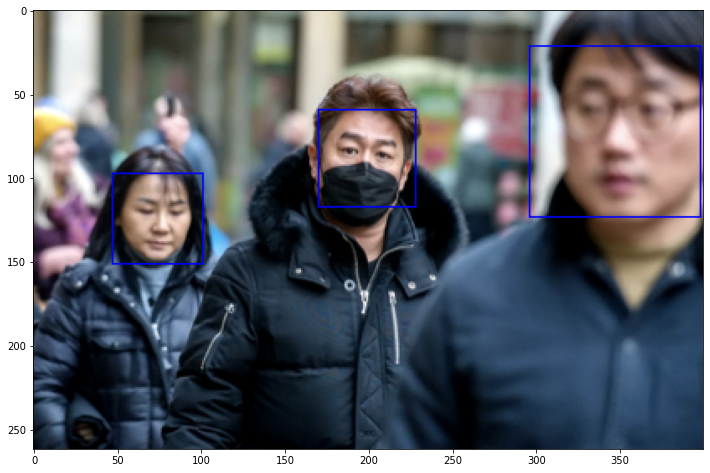

In [ ]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('/content/maksssksksss244.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

is_mask:  MASK
bbox:  296 21 398 123
[[0.32878977 0.24333838]]
is_mask:  MASK
bbox:  170 59 228 117
[[0.4134598 0.3324678]]
is_mask:  NO MASK
bbox:  47 97 101 151
[[0.16333613 0.6310062 ]]


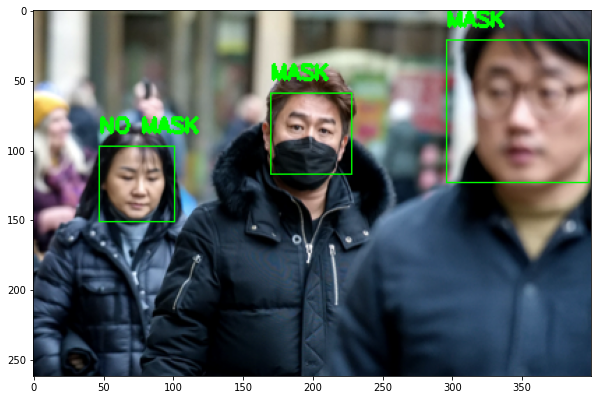

In [ ]:
from scipy.spatial import distance

import numpy as np

MIN_DISTANCE = 130
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    # for i in range(len(faces)-1):
    #     for j in range(i+1, len(faces)):
    #         dist = distance.euclidean(faces[i][:2],faces[j][:2])
    #         if dist<MIN_DISTANCE:
    #             label[i] = 1
    #             label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)

        print("is_mask: ",mask_label[mask_result.argmax()])
        print("bbox: ", x, y, x+w, y+h)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

In [ ]:
MIN_DISTANCE = 130
